## Observations and Insights 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#used the outer merge to combine both datasets to include all of the entries.
merged_df = pd.merge(mouse_metadata, study_results, how = "outer", on="Mouse ID")
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice.
unique_mouse_count = len(merged_df["Mouse ID"].unique())
unique_mouse_count
print(f'The number of mice in the DataFrame is {unique_mouse_count}')

The number of mice in the DataFrame is 249


In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
duplicate_mice_by_ID = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice_by_ID
#mouse ID is g989
print(f'The duplicate mouse ID is {duplicate_mice_by_ID}')

The duplicate mouse ID is ['g989']


In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
#looking for mouse ID g989
mouse_ID_g989 = merged_df.loc[(merged_df["Mouse ID"] == "g989")]
mouse_ID_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# uses loc to filter by all entries in the Mouse ID column that does not have the mouse ID g989
merged_df_clean_g989 = merged_df.loc[(merged_df["Mouse ID"] != "g989")]
merged_df_clean_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Checking the number of mice in the clean DataFrame.
merged_df_clean_g989["Mouse ID"].value_counts()
print(f'There are {len(merged_df_clean_g989["Mouse ID"].value_counts())} mice in the clean DataFrame')

There are 248 mice in the clean DataFrame


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#using the merged_df_clean_g989 and grouping by drug regimen to see what the stats are for each drug
group_dr_cleaned_df = merged_df_clean_g989.groupby("Drug Regimen")
#group_dr_cleaned_df.head()
tumor_mean = group_dr_cleaned_df["Tumor Volume (mm3)"].mean()
#tumor_mean
tumor_median = group_dr_cleaned_df["Tumor Volume (mm3)"].median()
#tumor_median
tumor_variance = group_dr_cleaned_df["Tumor Volume (mm3)"].var()
#tumor_variance
tumor_stddev = group_dr_cleaned_df["Tumor Volume (mm3)"].std()
#tumor_stddev
tumor_sem = group_dr_cleaned_df["Tumor Volume (mm3)"].sem(ddof=0)
#tumor_sem

#summarizing these stats into a single DataFrame
summary_stats_cleaned_df = {"Mean": tumor_mean,
                            "Median": tumor_median,
                            "Variance": tumor_variance,
                            "Standard Deviation": tumor_stddev,
                            "Standard Error of Mean": tumor_sem,
}

summary_stats_cleaned_df = pd.DataFrame(summary_stats_cleaned_df)
summary_stats_cleaned_df


,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

#https://www.geeksforgeeks.org/how-to-combine-groupby-and-multiple-aggregate-functions-in-pandas/
#modified by putting brackets around Tumor Volume (mm3) because spaces are not allowed in the syntax
agg_tumorvolume_df = merged_df_clean_g989.groupby(merged_df_clean_g989["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean",
                                                                                                                   "median",
                                                                                                                   "var",
                                                                                                                   "std",
                                                                                                                   "sem"])
agg_tumorvolume_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

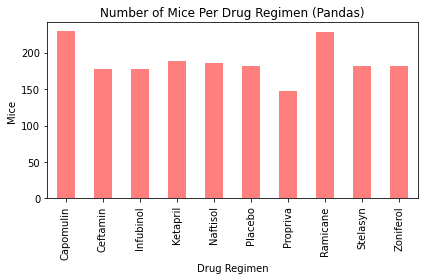

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#number of mice per drug regimen
drug_regimen_mice_count = merged_df_clean_g989.groupby(["Drug Regimen"]).count()["Mouse ID"]

drug_regimen_mice_count.plot(kind = "bar", title = "Number of Mice Per Drug Regimen (Pandas)", color='r', alpha=.5)
#plt.title("Average Rain per State")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.tight_layout()
plt.savefig("graphs/bar_and_pie_charts_-_numberofmiceperdrugregimenpandas.png")
plt.show()


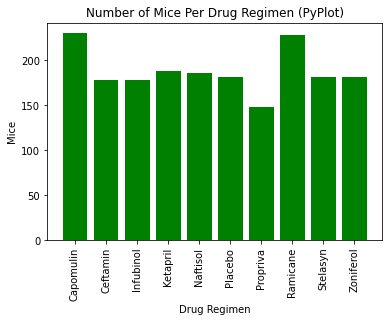

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#from MatPlotLib Day 1 Activity 08:
drug_regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
#10 drugs, therefore we need 10 points along the x axis
#alternatively np.arange(0, 10, 1)
x_axis = np.arange(len(drug_regimen_mice_count))
y_axis = drug_regimen_mice_count
plt.bar(x_axis, y_axis, color = "g", align = "center")
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.xticks(tick_locations, drug_regimen, rotation = "vertical")
plt.title("Number of Mice Per Drug Regimen (PyPlot)")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.tight_layout
plt.savefig("graphs/bar_and_pie_charts_-_numberofmiceperdrugregimenpyplot.png")
plt.show()


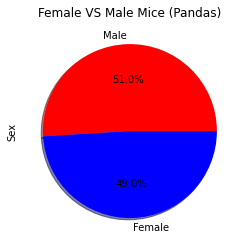

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#count how many of each sex there are in the entire cleaned DataFrame
sex_count = merged_df_clean_g989["Sex"].value_counts()

#time to make it fancy
colors = ["red", "blue"]
explode = (0.1, 0)
pie_sex_count = sex_count.plot(kind = "pie", colors = colors, title = "Female VS Male Mice (Pandas)", autopct = "%1.1f%%", shadow = True)
plt.savefig("graphs/bar_and_pie_charts_-_femalevsmalemicepandas.png")
plt.show()

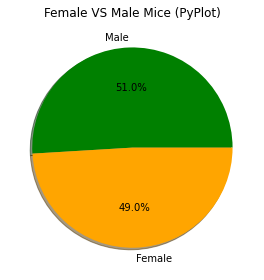

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_count, labels = merged_df_clean_g989["Sex"].unique(), colors = ["green", "orange"], autopct = "%1.1f%%", shadow = True)
plt.title("Female VS Male Mice (PyPlot)")
plt.tight_layout()
plt.savefig("graphs/bar_and_pie_charts_-_femalevsmalemicepyplot.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#assuming we use the original merged DataFrame since there is no mention of the cleaned DataFrame
# timepoint_1 = merged_df.groupby("Mouse ID")["Timepoint"].max()
# timepoint_2 = timepoint_1.sort_values()
# timepoint_3 = timepoint_2.reset_index()
#groups by Mouse ID, finds maximum value in the Timepoint column, then sorts those values and finally resets the index
greatest_timepoint_df = pd.DataFrame(merged_df.groupby("Mouse ID")["Timepoint"].max().sort_values().reset_index())
#greatest_timepoint_df.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_timepoint_merged_df = pd.merge(merged_df, greatest_timepoint_df, on = "Mouse ID")
#greatest_timepoint_merged_df.head()
greatest_timepoint_merged_df = greatest_timepoint_merged_df.rename(columns = {"Timepoint_y": "Greatest Timepoint", "Timepoint_x": "Timepoint"})
greatest_timepoint_merged_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
drug_limit = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
drug_tumorvol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#loops through . Creates variable drug_name that goes through the limited treatment list
for drug_name in drug_limit:
    #filters using loc in the dataframe above for each drug name (one at a time)
    loop_druglimit_df = greatest_timepoint_merged_df.loc[greatest_timepoint_merged_df["Drug Regimen"] == drug_name]
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #finds the row where Timepoint and Greatest Timepoint match, which is where the final tumor volume will be.
    greatest_volume_df = loop_druglimit_df.loc[loop_druglimit_df["Timepoint"] == loop_druglimit_df["Greatest Timepoint"]]

    # add subset 
    volume_final = greatest_volume_df["Tumor Volume (mm3)"]
    #adds the final volume data to drug_tumorvol_data. volume_final changes each loop, but drug_tumorvol_data stores all loop entries.
    drug_tumorvol_data.append(volume_final)
    
    # Determine outliers using upper and lower bounds
    quartiles = volume_final.quantile([0.25, 0.5, 0.75])
    upperquartile = quartiles[0.75]
    lowerquartile = quartiles[0.25]
    iqr = upperquartile - lowerquartile
    upper_bound = upperquartile + (1.5 * iqr)
    lower_bound = lowerquartile - (1.5 * iqr)
    
    outlier_count = (volume_final.loc[(greatest_volume_df["Tumor Volume (mm3)"] >= upper_bound) | 
                                        (greatest_volume_df["Tumor Volume (mm3)"] <= lower_bound)]).count()

    print(f"{drug_name}'s interquartile range is: {iqr}")
    print(f"{drug_name}'s upper bound is: {upper_bound}")
    print(f"{drug_name}'s lower bound is: {lower_bound}")
    print(f"{drug_name} contains {outlier_count} outliers. Please investigate any outliers")
    
    #thank you Anthony for recommending a for loop. This would have been a nightmare using brute force...

Capomulin's interquartile range is: 7.781863460000004
Capomulin's upper bound is: 51.83201549
Capomulin's lower bound is: 20.70456164999999
Capomulin contains 0 outliers. You should look into them...
Ramicane's interquartile range is: 9.098536719999998
Ramicane's upper bound is: 54.30681135
Ramicane's lower bound is: 17.912664470000003
Ramicane contains 0 outliers. You should look into them...
Infubinol's interquartile range is: 11.477135160000003
Infubinol's upper bound is: 82.74144559000001
Infubinol's lower bound is: 36.83290494999999
Infubinol contains 1 outliers. You should look into them...
Ceftamin's interquartile range is: 15.577752179999997
Ceftamin's upper bound is: 87.66645829999999
Ceftamin's lower bound is: 25.355449580000002
Ceftamin contains 0 outliers. You should look into them...


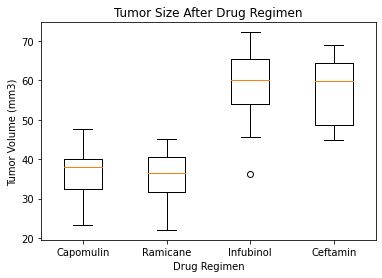

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_tumorvol_data)
plt.title("Tumor Size After Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
x_axis = np.arange(len(drug_limit))
tick_locations = []
for x in x_axis:
    #can't just append(x) because that makes the IQR start at 0. Added 1 to give it some space
    tick_locations.append(x+1)
plt.xticks(tick_locations, drug_limit, rotation = "horizontal")
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.savefig("graphs/Quartiles_Outliers_and_Boxplots_-_tumorsizeafterdrugregimen.png")
plt.show()


## Line and Scatter Plots

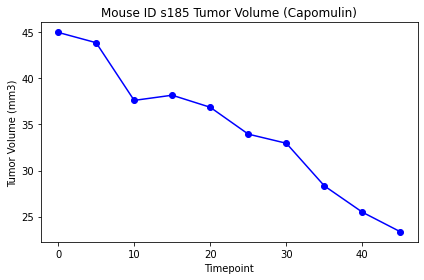

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


capomulin_df = greatest_timepoint_merged_df.loc[greatest_timepoint_merged_df["Drug Regimen"] == "Capomulin"]
#capomulin_df

#focusing on the first mouse, mouse ID s185
s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
#s185_df

x_axis = s185_df["Timepoint"]
#x_axis
y_axis = s185_df["Tumor Volume (mm3)"]
#y_axis

plt.title("Mouse ID s185 Tumor Volume (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis, marker="o", color="blue", label="s185")
plt.tight_layout()

plt.savefig("graphs/Line_and_Scatter_Plots_-_tumorvolumevstimepointmouses185.png")
plt.show()

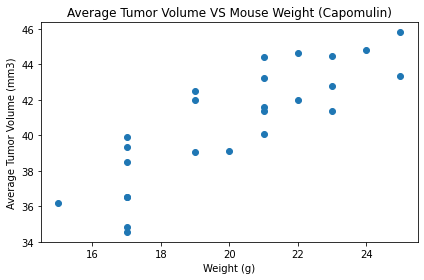

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_tumor_vol_sorted_weight = capomulin_df.groupby(['Mouse ID']).mean().sort_values(by  = "Weight (g)")

x_value = avg_tumor_vol_sorted_weight["Weight (g)"]
y_value = avg_tumor_vol_sorted_weight["Tumor Volume (mm3)"]
plt.scatter(x_value, y_value)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume VS Mouse Weight (Capomulin)")
plt.tight_layout()

plt.savefig("graphs/Line_and_Scatter_Plots_-_averagetumorvolumevsmouseweight(capomulin).png")
plt.show()

## Correlation and Regression

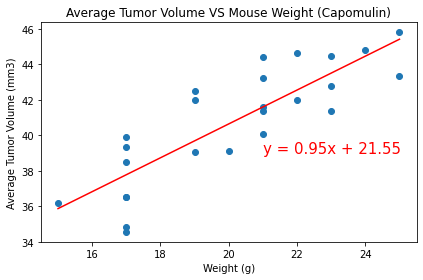

The r-squared is: 0.7088568047708723


In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
#y = m * x + b
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (21,39), fontsize = 15, color="red")
plt.title("Average Tumor Volume VS Mouse Weight (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.savefig("graphs/Line_and_Scatter_Plots_-_averagetumorvolumevsmouseweight(capomulin)withregression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
